# 14.3 신생아 이름
1880년부터 신생아 이름에 대한 정보를 DB화

In [1]:
import pandas as pd

In [2]:
names1880 = pd.read_csv('data/pydata-book-2nd-edition/datasets//babynames/yob1880.txt', 
                        names=['name', 'sex', 'births'])  # 경로 표시할때, / 와 // 다 가능
# 같은 폴더의 NationalReadMe.pdf 파일 안에 파일에 관한 정보가 있음(,로 나눠놨다 같은)
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2000 non-null   object
 1   sex     2000 non-null   object
 2   births  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.tail()

,name,sex,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [6]:
names1880.groupby('sex').births.sum() # names1880에 관해 성별(sex)로 groupby해서 sum 함

sex
F     90993
M    110493
Name: births, dtype: int64

In [7]:
# 년도별 파일이 여러개 있는데, 얘를 하나의 DataFrame으로 만들어 보자

years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data/pydata-book-2nd-edition/datasets//babynames/yob%d.txt' % year  # %d -> 숫자 전체 불러오기 위해. 파일명이 yob로 시작
    frame = pd.read_csv(path, names=columns)  # pd.read_csv로 읽어와서 (엪에는 path를 주고, names는 coulmns)
    
    # 그냥 붙이면 우리가 년도를 모름.  -> 여기다가 year라는 연도를 새로 넣어줌. -> 그래야 식별 가능
    frame['year'] = year
    pieces.append(frame)
    
# 모두 하나의 DataFrame으로 합치기
names = pd.concat(pieces, ignore_index=True)  # concat으로 붙임. 
                                        #그런데 그럼 각자의 index가 다 옴. -> ignore_index=True로 각자가 갖고 있는 index는 무시

In [8]:
names.info()  # 169만 784개의 data가 있는걸 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [9]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [10]:
# 년도별로 sum을 해보자 -> 피벗테이블(pivot_table)로 단한하게 가능
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)  # aggfunc(어그리 펑션)을 안주면 평균이 됨.
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [11]:
total_births.plot(title='Total births by sex and year')

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

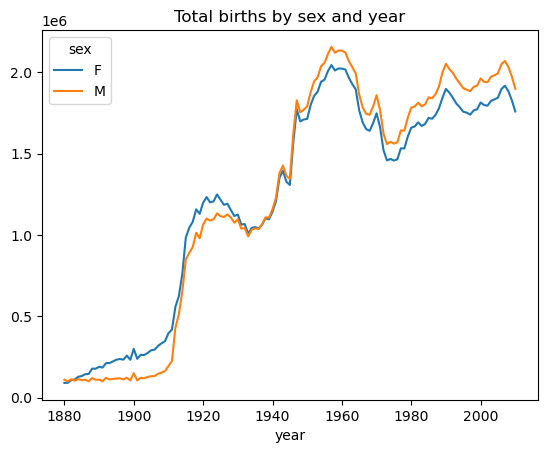

In [12]:
import matplotlib.pyplot as plt
plt.show()

In [13]:
def add_porp(group):  # prop을 만들어서 비율 계산
    group['prop'] = group.births / group.births.sum()# 그룹의 출생수에, sum으로 나눠주면 비율이 됨
    return group

names = names.groupby(['year', 'sex']).apply(add_porp) # 특정 년도 특정 성별에서 그 이름이 차지하는 비율은 계산하는 것.
                                 # 그래서 apply()해서(add_prop)을 넣어주는 것

In [14]:
names  # names에 새로운 prop 컬럼이 추가되었다.

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [15]:
# 그룹 관련 연산을 수행할 때는 모든 그룹에서 prop 컬럼의 합이 1이 맞는지 확인하는 새너티 테스트를 하는 게 좋다.
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [16]:
# 이제 모든 준비가 끝났고, 분석에 사용할 각 연도별/성별에 따른 선호하는 이름 1,000개를 추출하자. 이것 역시 그룹 연산이다.
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# 그룹 색인은 필요없으므로 삭제
top1000.reset_index(inplace=True, drop=True)

In [17]:
# 함수를 정의하지 않고 직접 추출하고 싶다면 다음처럼 할 수도 있다.
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [18]:
# 이제 데이터셋의 크기가 조금 줄었다.
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


# 14.3.1 이름 유행 분석
전체 데이터셋과 상위 1,000개의 이름 데이터로 흥미로운 이름 유행을 분석해보자.\
먼저 상위 1,000개의 데이터를 남자아이와 여자아이로 분리한다.

In [25]:
boys = top1000[top1000.sex == 'M']

In [30]:
girls = top1000[top1000.sex == 'F']

In [31]:
# 연도별로 Jogn이나 Mary라는 이름의 추이를 간단하게 그래프로 그릴 수 있는데, 그전에 데이터를 살짝 변경할 필요가 있다.
# 연도와 이름에 대한 전체 출생수를 피벗데이블로 만들자.
total_births = top1000.pivot_table('births', index='year',
                                 columns='name',
                                 aggfunc=sum)

In [32]:
# DataFrame의 plot 메서드를 사용해서 몇몇 이름의 추이를 그래프로 그려보자.
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [33]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

In [34]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
           title="Number of births per year")

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

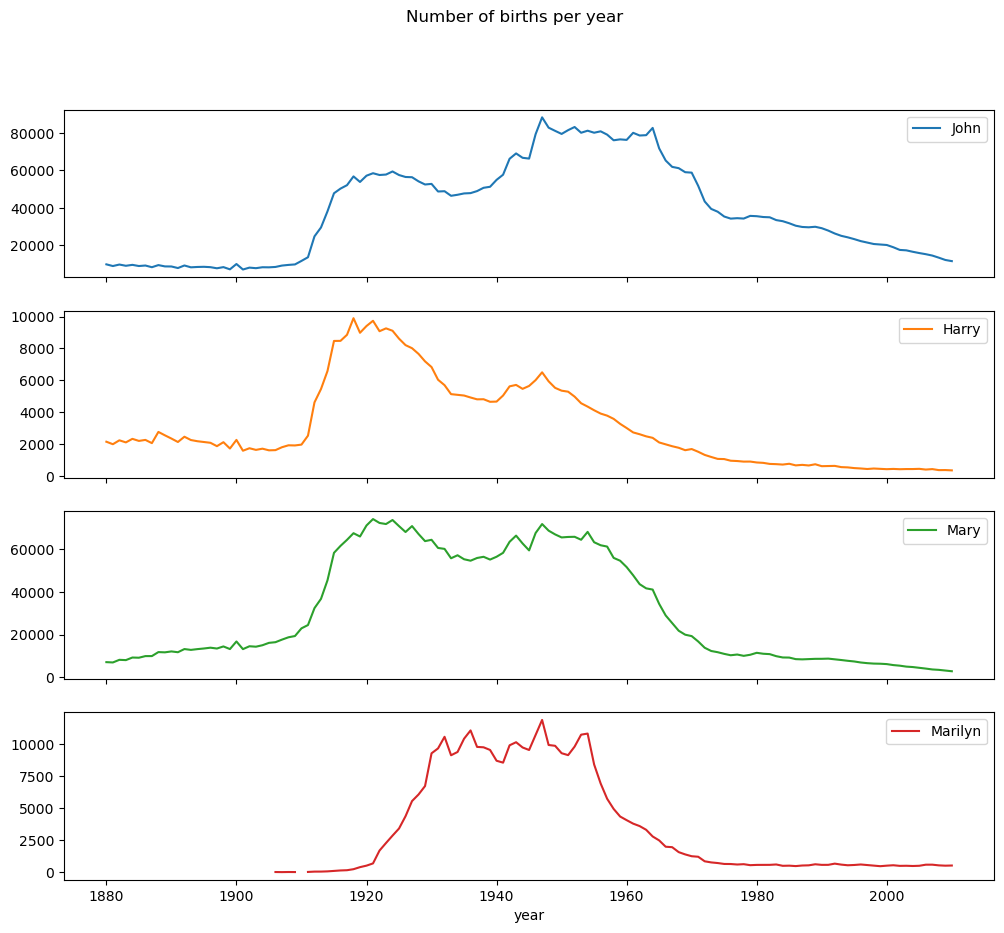

In [35]:
plt.show()

In [36]:
# 그래프를 보면 예로 든 이름들이 최근 미국에서 인기가 없다는 걸 알 수 있다.
# 하지만 단순히 이렇게 결론을 내기에는 조금 복잡한데 이 부분은 다음 절에서 살펴보겠다.

### 다양한 이름을 사용하는 경향 측정하기
위에서 확인한 그래프의 감소 추세를 부모가 아이의 이름을 지을 때 흔한 이름은 기피한다고 해석할 수 있다.\
이 가설은 데이터에서 살펴볼 수 있으며 확인이 가능하다.\
좀 더 자세히 알아보기 위해 인기 있는 이름 1,000개가 전체 출생수에서 차지하는 비율을 연도별/성별 그래프로 그려보자

In [139]:
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

In [140]:
# np. 을 사용하기 위해
import numpy as np

table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

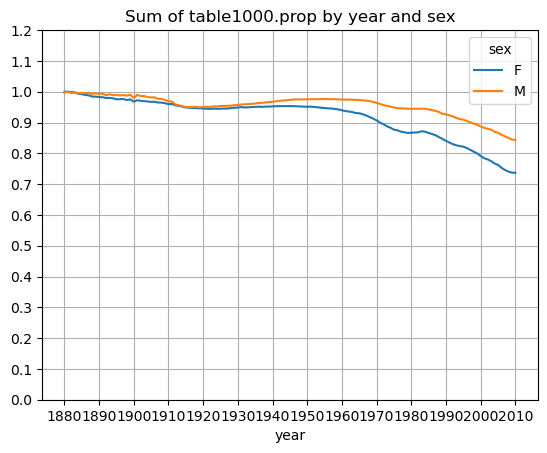

In [141]:
plt.grid(True) # grid 추가
plt.show()

In [81]:
# 그림에서 확인할 수 있듯이 실제로 이름의 다양성이 증가하고 있음을 보여준다. (상위 1,000개의 이름에서 비율의 총합이 감소하고 있다.)
# 또한 인기 있는 이름순으로 정렬했을 때 전체 출생수의 50%를 차지하기까지 등장하는 이름수도 흥미롭다.

In [82]:
df = boys[boys.year == 2010]

In [83]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [84]:
# prop을 내림차순으로 정렬하고 나서 전체의 50%가 되기까지 얼마나 많은 이름이 등장하는지 알아보자.
# for문을 사용해서 구현할 수도 있지만, 벡터화된 Numpy를 사용하는 편이 조금 더 편하다.

In [85]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()  #  prop의 누계를 cumsu에 저장하고

In [86]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [87]:
# searchsorted 메서드를 호출해서 정렬된 상태에서 누계가 0.5가 되는 위치를 구한다.
prop_cumsum.values.searchsorted(0.5)

116

In [88]:
# 배열의 색인은 0부터 시작하기 떄문에 결과에 1을 더해주면 117이 나온다.
# (1900년에는 이보다 더 낮았다)

In [89]:
df = boys[boys.year == 1900]

In [90]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [92]:
in1900.values.searchsorted(0.5) + 1

25

In [93]:
# 이제 이 연산을 각 연도별/성별 조합에 적용할 수 있다.
# 연도와 성을 groupby로 묶고 각 그룹에 apply를 사용해서 이 연산을 적용하면 된다.

In [121]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1  # 이렇게 만들어진 group에 prop을 cumsum()해서 values에 searchsorted해서 <- 얘를 q값을 주고 +1을 함

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)


In [122]:
# 연산 결과인 diversity DataFrame은 이제 각 성별에 따라 연도별로 색인된 두 개의 시계열 데이터를 담고 있다.

In [123]:
diversity.head()  # top1000이 차지하는 비율이 1800년도에는 여성이 38, 남성이 14

year  sex
1880  F      38
      M      14
1881  F      38
      M      14
1882  F      38
dtype: int64

In [124]:
# 여성이 남성보다 이름의 다양성이 훨씬 큼
diversity.tail()

year  sex
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
dtype: int64

In [125]:
diversity = diversity.unstack('sex')  # unstack -> 성별 index를 column 이름으로 바꾸겠다는 것
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


In [126]:
diversity.tail()

sex,F,M
year,,
2006,209,99
2007,223,103
2008,234,109
2009,241,114
2010,246,117


In [127]:
diversity.plot(title="Number of popular namesin top 50%", figsize=(10, 8))

<AxesSubplot:title={'center':'Number of popular namesin top 50%'}, xlabel='year'>

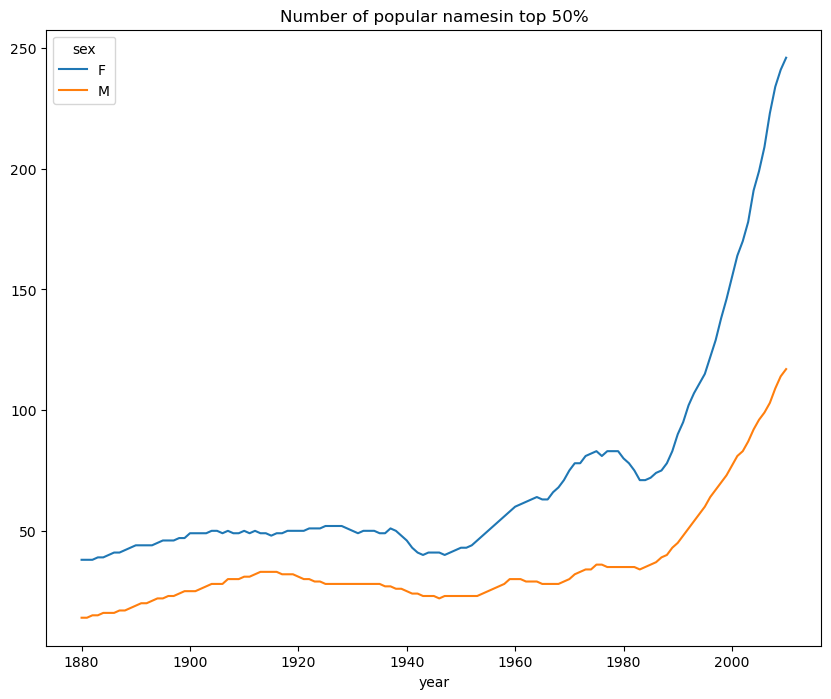

In [128]:
plt.show()

보다시피 여자아이의 이름은 항상 남자아이 이름보다 더 다양하며,시간이 흐를수록 더욱 다양해지고 있다.\
대체되는 철자의 증가 같은 다양성을 높이는 요인에 대한 자세한 분석은 여러분의 몫으로 남겨두겠다.

### '마지막 글자'의 변화
2007년 아이 이름을 연구하는 로라 와튼버그는 지난 100년동안 남자아이 이름의 마지막 글자의 분포에 중요한 변화가 있었다고 자신의 웹사이트에 게재했다.\
지금부터 전체 자료에서 연도, 성별, 이름의 마지막 글자를 수집해서 이를 확인해보자. (영어는 알파벳이라 이런게 가능)

In [142]:
# name 컬럼에서 마지막 글자를 추출한다.
get_last_letter = lambda x: x[-1]  # get_last_letter로 lambda의 함수를 만듬
last_letters = names.name.map(get_last_letter) # names(초기 DataFrame)에 name이란 column값을 map을 이용해서 위에서 만듬 lambda함수(get_last_letter)를 적용함
last_letters.name = 'last_letter' # last_letters의 이름을 = last_letter라고 이름지어줌

last_letters # 보면 마지막 글자만 쭉 뽑은 것

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [144]:
table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum) # names에 pivot을 돌리는데, 출생수에 대해, index를 last_letters로,
# 우리가 출력하고자 하는 column은, sex, year.  그리고 aggfunc에 sum을 줄 것.

table  # 이걸 보면 -> 각 last글자들을 연도별로 sum을 한 것

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [145]:
# 이제 전체 기간 중 세 지점을 골라 이름의 마지막 글자 몇 개를 출력해보자. (1910, 1960, 2010)
subtable = table.reindex(columns=[1910, 1960, 2010], level='year') # 위에 성별과 연도로 구별되어있는데, 여기선 연도를 사용

In [146]:
subtable.head() # 연도 3개만 추려서 뽑음

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [148]:
# a, b, c, d, e가 전체에서 차지하는 비율을 구해보자
# 분모를 sum으로 주고, 분자를 각 항목으로 주면 됨 ->각각의 숫자를 비율로
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

In [149]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

[<AxesSubplot:> <AxesSubplot:>]


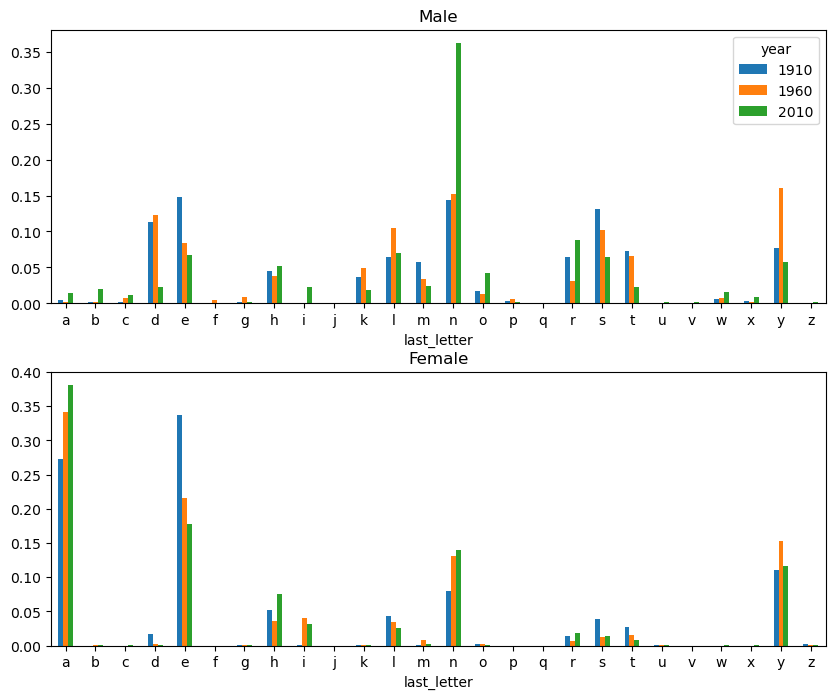

In [154]:
# 위의 정보를 가지고 그래프를 그려보자
fig, axes = plt.subplots(2, 1, figsize=(10,8))
print(axes) # ->  [<AxesSubplot:> <AxesSubplot:>]
plt.subplots_adjust(hspace=0.25) # 위아래 그래프를 그릴때, 0.25만큼 때어주라는 소리 -> 위 그래프의 x값과 아래그래프의 제목과 겹치므로
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male') # rot=0 -> 회전은 안시키겠다, ax=axes[0] -> 축은 0번째 -> 이거의 0번째가 람다거가 아니고 위에거.
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)  # title 안주면 안나옴
plt.show()

In [155]:
# 전체 데이터에서 로라가 지정한 3개의 글자를 보자 ( -> d, n, y)
letter_prop = table / table.sum()   #  이렇게 퍼센트를 구하고,
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M']
dny_ts.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
d,0.083055,0.083247,0.085340,0.084066,0.086120,0.085472,0.087647,0.089072,0.087707,0.091934,...,0.031352,0.028794,0.027069,0.026118,0.025420,0.025075,0.024451,0.023574,0.023398,0.023387
n,0.153213,0.153214,0.149560,0.151646,0.149915,0.146361,0.149659,0.148838,0.151286,0.151976,...,0.317495,0.325086,0.336344,0.341151,0.344319,0.351666,0.358274,0.361101,0.362523,0.362771
y,0.075760,0.077451,0.077537,0.079144,0.080405,0.081882,0.081681,0.082870,0.084919,0.086328,...,0.071687,0.069397,0.066197,0.064781,0.062806,0.060338,0.059634,0.060342,0.057223,0.058168


In [156]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T  #  .T  ->  x축, y축 값을 뒤바꿔버림
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [163]:
dny_ts.plot()

<AxesSubplot:xlabel='year'>

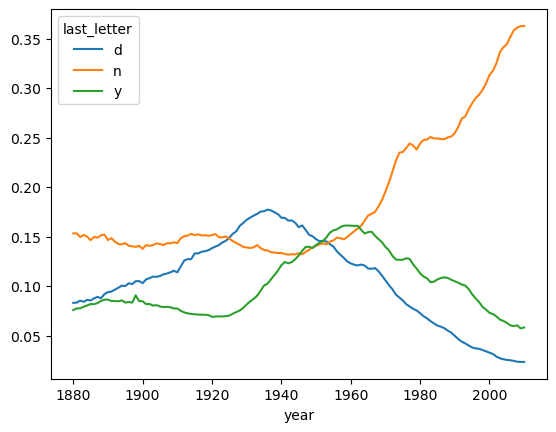

In [164]:
plt.show()

### 남자 이름과 여자 이름이 바뀐 경우

In [ ]:
# top1000에서 Lesley, Leslie를 다 포함해야하니 -> lesl을 포함하는 목록을 만들어 보자

In [166]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]  # .contains()해서 lesl이 들어가 있는 놈

lesley_like  # -> 이렇게 뽑아보면 5개가 나옴

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [167]:
filtered = top1000[top1000.name.isin(lesley_like)]
# 이름으로 groupby
filtered.groupby('name').births.sum()
# topp1000에서 sum을 한 결과

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [168]:
filtered.head()  # filtered 년도별로 몇명몇명만 가져오는 놈. -> 이렇게 생김

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083


In [172]:
# 연도별 남,여 의 sum을 구해보자
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')  # display는 성별만 함  / aggfunc='sum' 이놈 ''붙여도 돌아가내. 신기하내. 원래는 안붙임

table  # 년도별로 출생수 sum 한 것

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [174]:
table = table.div(table.sum(1), axis=0)  #  table.sum(1) -> axis값을 1을 준것 => axis=1 을 준거랑 똑같은 뜻    -> sum한 값으로 table을 나누란 소리 -> 비율이 나옴
print(table)
# table은 dataFrame , dataFrame의 sum
table.head()  #  이렇게도 할 수 있다.


# 홈페이지(https://pandas.pydata.org/docs/reference/index.html)에서
# DataFrame의 .sum값을 확인할 수 있음
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum)
# DataFrame.sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, **kwargs)   <- 이렇게 나옴

# 여기서 [0]번째 값이니까
# DataFrame.sum(axis=None,
# 즉 aixs   랑 같은 값임.

sex          F         M
year                    
1880  0.091954  0.908046
1881  0.106796  0.893204
1882  0.065693  0.934307
1883  0.053030  0.946970
1884  0.107143  0.892857
...        ...       ...
2006  1.000000       NaN
2007  1.000000       NaN
2008  1.000000       NaN
2009  1.000000       NaN
2010  1.000000       NaN

[131 rows x 2 columns]


sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [178]:
table.plot(style={'M': 'k-', 'F': 'k--'})  # k 로 해서 흑백으로 나옴 -> b로하면 파랑, r로 하면 red

<AxesSubplot:xlabel='year'>

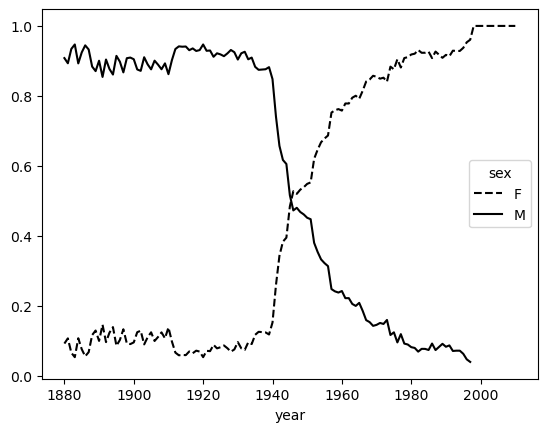

In [179]:
plt.show()

In [180]:
table.plot(style={'M': 'b-', 'F': 'r--'})

<AxesSubplot:xlabel='year'>

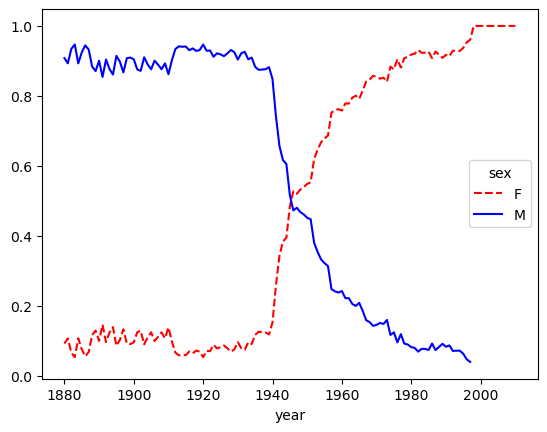

In [181]:
plt.show()